In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import ast
import re
from collections import Counter
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


In [2]:
# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

### 1. Understanding Data 

#### 1.1 Loading Dataset and Visualizing the data 


In [3]:
# loading dataset 
df = pd.read_csv(r'D:\DATA SCIENCE AND ML\job_trend_predictor\airflow_automation\etl_pipeline\data\raw\jobs.csv')
# df = pd.read_csv(r'D:\DATA SCIENCE AND ML\job_trend_predictor\airflow_automation\etl_pipeline\data\raw\scraped_data.csv')
print("Dataframe shape:", df.shape)
print(f"Columns: {df.columns.tolist()}")
df.head()

Dataframe shape: (7449, 24)
Columns: ['Unnamed: 0', 'Job Id', 'Experience', 'Qualifications', 'Salary Range', 'location', 'Country', 'latitude', 'longitude', 'Work Type', 'Company Size', 'Job Posting Date', 'Preference', 'Contact Person', 'Contact', 'Job Title', 'Role', 'Job Portal', 'Job Description', 'Benefits', 'skills', 'Responsibilities', 'Company', 'Company Profile']


,Unnamed: 0,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,Job Posting Date,Preference,Contact Person,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
0,61,401560922349533,5 to 12 Years,PhD,$57K-$125K,New Delhi,India,20.5937,78.9629,Full-Time,42159,2022-09-28,Female,Samantha Ramirez,635.430.4890,Account Executive,Sales Account Executive,Internships.com,A Sales Account Executive is responsible for a...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Sales strategies and tactics Account managemen...,Identify and pursue sales opportunities with n...,GlaxoSmithKline,"{""Sector"":""Pharmaceuticals"",""Industry"":""Pharma..."
1,145,2122997813566133,0 to 14 Years,BBA,$55K-$95K,New Delhi,India,20.5937,78.9629,Contract,102180,2022-07-17,Female,Michael Harris,001-231-466-9867x086,Customer Service Representative,Call Center Agent,Jobs2Careers,A Call Center Agent handles incoming and outgo...,"{'Childcare Assistance, Paid Time Off (PTO), R...",Customer service Call center operations Proble...,Handle incoming phone calls and provide inform...,Textron,"{""Sector"":""Aerospace & Defense"",""Industry"":""Ae..."
2,293,3096609007532611,4 to 13 Years,BBA,$55K-$108K,New Delhi,India,20.5937,78.9629,Full-Time,39814,2022-01-27,Male,Veronica Morgan,(764)507-7284,Civil Engineer,Water Resources Engineer,Internships.com,A Water Resources Engineer manages and develop...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Water resources engineering Hydrology and hydr...,"Focus on water-related projects, such as flood...",Nucor,"{""Sector"":""Metals and Mining"",""Industry"":""Meta..."
3,557,387786646229837,1 to 8 Years,BA,$64K-$92K,New Delhi,India,20.5937,78.9629,Contract,48770,2021-09-26,Female,Nicholas Fisher,(568)816-5906x200,Veterinarian,Equine Veterinarian,USAJOBS,An Equine Veterinarian specializes in the heal...,"{'Legal Assistance, Bonuses and Incentive Prog...",Equine veterinary medicine Horse anatomy and p...,Specialize in the care and treatment of horses...,Reliance Steel & Aluminum,"{""Sector"":""Metals"",""Industry"":""Metals"",""City"":..."
4,561,1100226011415881,5 to 12 Years,BA,$56K-$124K,New Delhi,India,20.5937,78.9629,Intern,33699,2022-06-13,Female,Jessica Miller,(948)229-6940x6724,Legal Counsel,Employment Lawyer,Stack Overflow Jobs,Employment Lawyers focus on employment law mat...,"{'Life and Disability Insurance, Stock Options...",Employment law and regulations Employment cont...,"Advise on employment law matters, including la...",Booz Allen Hamilton Holding,"{""Sector"":""Professional Services"",""Industry"":""..."


#### 1.2 Understanding Columns of dataset and their datatypes

In [4]:

print(f"Shalpe of Dataset: {df.shape}")
print(f"\nData Types :")
print(df.dtypes)

# finding number of features and their types
num_features = df.select_dtypes(include=[np.number]).columns.tolist()
cat_features = df.select_dtypes(include=['object']).columns.tolist()

print(f"\nNumerical Features ({len(num_features)}): {num_features}")
print(f"\nCategorical Features ({len(cat_features)}): {cat_features}")

Shalpe of Dataset: (7449, 24)

Data Types :
Unnamed: 0            int64
Job Id                int64
Experience           object
Qualifications       object
Salary Range         object
location             object
Country              object
latitude            float64
longitude           float64
Work Type            object
Company Size          int64
Job Posting Date     object
Preference           object
Contact Person       object
Contact              object
Job Title            object
Role                 object
Job Portal           object
Job Description      object
Benefits             object
skills               object
Responsibilities     object
Company              object
Company Profile      object
dtype: object

Numerical Features (5): ['Unnamed: 0', 'Job Id', 'latitude', 'longitude', 'Company Size']

Categorical Features (19): ['Experience', 'Qualifications', 'Salary Range', 'location', 'Country', 'Work Type', 'Job Posting Date', 'Preference', 'Contact Person', 'Contact', 'Jo

#### Observation :
   1. There are Zero numerical features.
   2. All features have `object` datatype.

#### 1.3 Finding NULL and Duplicated values

In [5]:
print("\nMissing values : ")
print(df.isnull().sum())
print(f"\nDuplicated row : {df.duplicated().sum()}")


Missing values : 
Unnamed: 0           0
Job Id               0
Experience           0
Qualifications       0
Salary Range         0
location             0
Country              0
latitude             0
longitude            0
Work Type            0
Company Size         0
Job Posting Date     0
Preference           0
Contact Person       0
Contact              0
Job Title            0
Role                 0
Job Portal           0
Job Description      0
Benefits             0
skills               0
Responsibilities     0
Company              0
Company Profile     23
dtype: int64

Duplicated row : 0


#### Observation : 
1. The data do not contain any duplicated value
2. Few features contain few null value betwee count of 1 to 5 
   
#### Conclusion : 
Since only categorical feature contain null value in very small amount so these null value can be __replace by 'None' string literal__

In [6]:
# replaceing missing values by "Unknown"
categorical_cols_having_null = ["Title","Company","Location","Role","Industry Type","Department","Employment Type","Role Category","Description"]

for col in categorical_cols_having_null:
    df[col].fillna("Unknown", inplace=True)
    
print("\nMissing values after imputation: ")
print(df.isnull().sum())

KeyError: 'Title'

### 2. Data Cleaning

#### 2.1 Cleaning and standardize categorical columns

In [ ]:
# Clean and standardize categorical columns
def clean_text(text):
    if pd.isna(text):
        return 'Unknown'
    return str(text).strip()

# Clean categorical columns
categorical_cols = df.columns[df.dtypes == 'object'].tolist()

for col in categorical_cols:
    df[col] = df[col].apply(clean_text)

#### 2.2 Analyzing and cleaning `Salary` , `Experience`, `Skill` salary.

In [ ]:
print("Sample of Salary column : ", df["Salary"].sample(5).tolist())
print("\nUnique values in Salary column : ", df["Salary"].unique())


Sample of Salary column :  ['Not Disclosed', 'Not Disclosed', 'Not Disclosed', 'Not Disclosed', 'Not Disclosed']

Unique values in Salary column :  ['Not Disclosed' '9-19 Lacs P.A.' '7-16 Lacs P.A.' '15-25 Lacs P.A.'
 '5-7 Lacs P.A.' '8.5-17 Lacs P.A.' '3-8 Lacs P.A.' '2.5-3 Lacs P.A.'
 '12-20 Lacs P.A.' '3-6 Lacs P.A.' '2.5-3.75 Lacs P.A.' '5-14 Lacs P.A.'
 '5-10 Lacs P.A.' '10-12 Lacs P.A.' '5-6 Lacs P.A.' '3.5-5.5 Lacs P.A.'
 '13-23 Lacs P.A.' '18-20 Lacs P.A.' '11-21 Lacs P.A.' '6-7.5 Lacs P.A.'
 '1.08-1.8 Lacs P.A.' '6-8 Lacs P.A.' '3-4.25 Lacs P.A.' '8-16 Lacs P.A.'
 '3-4 Lacs P.A.' '1-2.5 Lacs P.A.' '3.6-3.84 Lacs P.A.' '1-3.5 Lacs P.A.'
 'Unpaid' '2.25-4 Lacs P.A.' '60,000-1.25 Lacs P.A.' '1.5-6.5 Lacs P.A.'
 '3-7.2 Lacs P.A.' '2-5 Lacs P.A.' '10-20 Lacs P.A.' '27.5-32.5 Lacs P.A.'
 '20-32.5 Lacs P.A.' '8-18 Lacs P.A.' '3-5 Lacs P.A.' '15-22 Lacs P.A.'
 '80,000-1.25 Lacs P.A.' '14-24 Lacs P.A.' '20-35 Lacs P.A.'
 '11-15 Lacs P.A.' '5-8.5 Lacs P.A.' '8-13 Lacs P.A.' '7.5-15 Lacs

#### Observation :
Salary column contain salary data in range format e.g (7-8 LPA) with encoded into object dtype

#### Conclusion : We will extract average salary and add as a new feature in dataset

In [ ]:
print("\nSample of Experience column : ", df["Experience"].sample(5).tolist())
print("Unique values in Experience column : ", df["Experience"].unique())




Sample of Experience column :  ['0 - 1 years', '4 - 9 years', '6 - 11 years', '0 - 5 years', '3 - 5 years']
Unique values in Experience column :  ['0 - 2 years' '4 - 7 years' '8 - 10 years' '5 - 10 years' '3 - 6 years'
 '9 - 14 years' '3 - 8 years' '3 - 5 years' '4 - 9 years' '2 - 7 years'
 '1 - 6 years' '8 - 13 years' '1 - 4 years' '3 - 7 years' '6 - 10 years'
 '2 - 5 years' '6 - 8 years' '5 - 8 years' '10 - 16 years' '0 - 5 years'
 '0 - 1 years' '6 - 11 years' '7 - 12 years' '0 - 4 years' '1 - 5 years'
 '0 - 3 years' '1 - 3 years' '4 - 6 years' '6 - 9 years' '2 - 3 years'
 '2 - 6 years' '15 - 20 years' '0 - 13 years' '0 - 8 years' '7 - 8 years'
 '12 - 15 years' '10 - 15 years' '15 - 25 years' '5 - 7 years'
 '0 - 6 years' '2 - 4 years' 'No fixed duration' '1 - 2 years'
 '1 - 7 years' '10 - 13 years' '4 - 8 years' '9 - 12 years' '5 - 9 years'
 '10 - 20 years' '7 - 11 years' '9 - 13 years' '6 - 15 years' '13 years'
 '1 - 10 years' '12 - 14 years' '8 - 11 years' '4 - 5 years'
 '7 - 10 y

#### Observation :
Experience column contain salary data in range format e.g (5 - 10 years) with encoded into object dtype

#### Conclusion : We will extract average experience and add as a new feature in dataset

In [ ]:
print("\nSample of Skills column : ", df["Skills"].sample(5).tolist())
print("\nUnique values in Skills column : ", df["Skills"].unique())


Sample of Skills column :  ["[['Ror', 'Ruby Rails', 'Ruby on Rail'], []]", "[['data analysis', 'sql', 'tableau', 'analysis tools', 'scrum'], ['cbap', 'project management', 'data management', 'bi', 'power bi', 'business analysis', 'process improvement', 'dashboards', 'business administration', 'strong interpersonal skills', 'project delivery', 'agile']]", "[['Web Content Management'], ['Removal', 'CSS', 'Editing', 'HTML', 'Web Designing', 'JQuery', 'Content Management', 'Web Content', 'Javascript', 'Web Content Writing', 'Bootstrap', 'Web Development']]", "[[], ['Computer science', 'Project management', 'Consulting', 'System integration', 'Manager Technology', 'Application development', 'SQL Azure', 'SDLC', 'Analytics', 'Python']]", "[['Msql', 'Powershell', 'MongoDB', 'Scripting', 'Python'], ['MSSQL Job Agent']]"]

Unique values in Skills column :  ["[[], ['algorithms', 'python', 'modeling', 'data analysis', 'data analytics', 'natural language processing', 'data mining', 'predictive', 

#### Observation :
Skills contain salary data in string contain multiple list eg. ("['python','Pandas'], ['Power Bi']") .

#### Conclusion : We will extract flatten list of skills with uniques values

In [ ]:
def extract_salary(salary_str):
    if pd.isna(salary_str) or salary_str == "Not disclosed":
        return np.nan

    numbers = re.findall(r'\d+', str(salary_str))
    if not numbers:
        return np.nan
    
    numbers = [int(x) for x in numbers]
    return sum(numbers)/len(numbers)


def extract_experience_years(exp_str):
    if pd.isna(exp_str):
        return np.nan
    
    numbers = re.findall(r'\d+', str(exp_str))
    if not numbers:
        return np.nan
    
    numbers = [int(x) for x in numbers]
    return sum(numbers)/len(numbers)
    

def process_skills(skills_str):
    if pd.isna(skills_str):
        return []
    
    try:
        skill_list = ast.literal_eval(skills_str)
        
        all_skills = []
        for skill_group in skill_list:
            if isinstance(skill_group, list):
                all_skills.extend(skill_group)
            
        cleaned_list = []
        for skill in all_skills:
            if isinstance(skill, str):
                cleaned_skill = skill.strip().lower()
                if cleaned_skill and len(cleaned_skill) > 1:
                    cleaned_list.append(cleaned_skill)

        return cleaned_list
    except (ValueError, SyntaxError):
        return []

In [ ]:
# Apply salary extraction
df['salary_numeric'] = df['Salary'].apply(extract_salary)

# Apply experience extraction
df['experience_years'] = df['Experience'].apply(extract_experience_years)

print("Salary and Experience processing completed.")
print(f"Salary range: {df['salary_numeric'].min():.2f} - {df['salary_numeric'].max():.2f} LPA")
print(f"Experience range: {df['experience_years'].min():.2f} - {df['experience_years'].max():.2f} years")


# Apply skills processing
df['skills_processed'] = df['Skills'].apply(process_skills)
df['skills_count'] = df['skills_processed'].apply(len)

print(f"\nSkills processing completed.")
print(f"Average skills per job: {df['skills_count'].mean():.2f}")
print(f"Max skills in a job: {df['skills_count'].max()}")


Salary and Experience processing completed.
Salary range: 0.00 - 57.50 LPA
Experience range: 0.00 - 20.00 years

Skills processing completed.
Average skills per job: 11.82
Max skills in a job: 37


In [ ]:
df.head()

,Job Type,Title,Company,Experience,Salary,Location,Education,Skills,Role,Industry Type,Department,Employment Type,Role Category,Description,Job URL,Timestamp,salary_numeric,experience_years,skills_processed,skills_count
0,Data Scientist,Data Scientist,Blue Star,0 - 2 years,Not Disclosed,Thane,EducationUG:Any GraduatePG:Any Postgraduate,"[[], ['algorithms', 'python', 'modeling', 'dat...","Data Scientist ,","Industrial Equipment / Machinery ,","Data Science & Analytics ,","Full Time, Permanent",Data Science & Machine Learning,Blue Star Ltd is looking for Data Scientist to...,https://www.naukri.com/job-listings-data-scien...,2025-09-17 05:44:17,NaN,1.0,"[algorithms, python, modeling, data analysis, ...",17
1,Data Scientist,Data Scientist,Capgemini,4 - 7 years,Not Disclosed,Bengaluru,EducationUG:Any GraduatePG:Any Postgraduate,"[['python', 'machine learning', 'tensorflow', ...","Data Scientist ,","IT Services & Consulting ,","Data Science & Analytics ,","Full Time, Permanent",Data Science & Machine Learning,"Your Role Gen AI ,Computer vision, Cloud exp ,...",https://www.naukri.com/job-listings-data-scien...,2025-09-17 05:44:22,NaN,5.5,"[python, machine learning, tensorflow, pytorch...",21
2,Data Scientist,Data Scientist,Cognizant,8 - 10 years,Not Disclosed,Chennai,EducationPG:LLM in Any Specialization,"[[], ['kubernetes', 'algorithms', 'python', 'd...","Full Stack Data Scientist ,","IT Services & Consulting ,","Data Science & Analytics ,","Full Time, Permanent",Data Science & Machine Learning,Role –Gen AI Engineer (Senior / Manager) Job L...,https://www.naukri.com/job-listings-data-scien...,2025-09-17 05:44:28,NaN,9.0,"[kubernetes, algorithms, python, data manageme...",21
3,Data Scientist,Data Scientist,Kotak Life Insurance,5 - 10 years,Not Disclosed,Bengaluru,EducationUG:Any GraduatePG:Any Postgraduate,"[['software development', 'presentation skills...","Full Stack Data Scientist ,","IT Services & Consulting ,","Data Science & Analytics ,","Full Time, Permanent",Data Science & Machine Learning,About The Role What we offer Our mission is si...,https://www.naukri.com/job-listings-data-scien...,2025-09-17 05:44:35,NaN,7.5,"[software development, presentation skills, da...",23
4,Data Scientist,Data Scientist - Artificial Intelligence,IBM,3 - 6 years,Not Disclosed,Bengaluru,EducationUG:B.Tech/B.E. in Any SpecializationP...,"[['Artificial Intelligence'], ['Data Science',...","Data Scientist ,","IT Services & Consulting ,","Data Science & Analytics ,","Full Time, Permanent",Data Science & Machine Learning,"As an Associate Data Scientist at IBM, you wil...",https://www.naukri.com/job-listings-data-scien...,2025-09-17 05:44:41,NaN,4.5,"[artificial intelligence, data science, matplo...",9


#### 2.3 Creating new features out of existing 

In [ ]:
# create additinal features for analysis
# Location tier (tier 1, tier 2, tier 3)
tier1_cities = ['mumbai', 'delhi', 'bangalore', 'bengaluru', 'hyderabad', 'pune', 'chennai', 'kolkata']
tier2_cities = ['ahmedabad', 'jaipur', 'surat', 'lucknow', 'kanpur', 'nagpur', 'indore', 'thane']

def get_city_tier(location):
    location = location.lower()
    
    if location in tier1_cities:
        return 'Tier 1'
    
    if location in tier2_cities:
        return 'Tier 2'
    return 'Tier 3'

# experience level categorization(entry, mid, senior)

def categorize_experience(years):
    if pd.isna(years):
        return 'Unknown'
    
    if years < 2:
        return 'Entry Level'
    elif 2 <= years < 5:
        return 'Mid Level'
    elif 5 <= years < 10:
        return 'Senior Level'
    else:
        return 'Expert Level'

In [ ]:
df["experience_level"] = df["experience_years"].apply(categorize_experience)
df["city_tier"] = df["Location"].apply(get_city_tier)

print("Additional features created:")
print(f"City tiers: {df['city_tier'].value_counts().to_dict()}")
print(f"Experience levels: {df['experience_level'].value_counts().to_dict()}")

Additional features created:
City tiers: {'Tier 1': 886, 'Tier 3': 700, 'Tier 2': 138}
Experience levels: {'Senior Level': 672, 'Mid Level': 672, 'Entry Level': 254, 'Expert Level': 118, 'Unknown': 8}


### 3. Exploratory Data Analysis (EDA) 

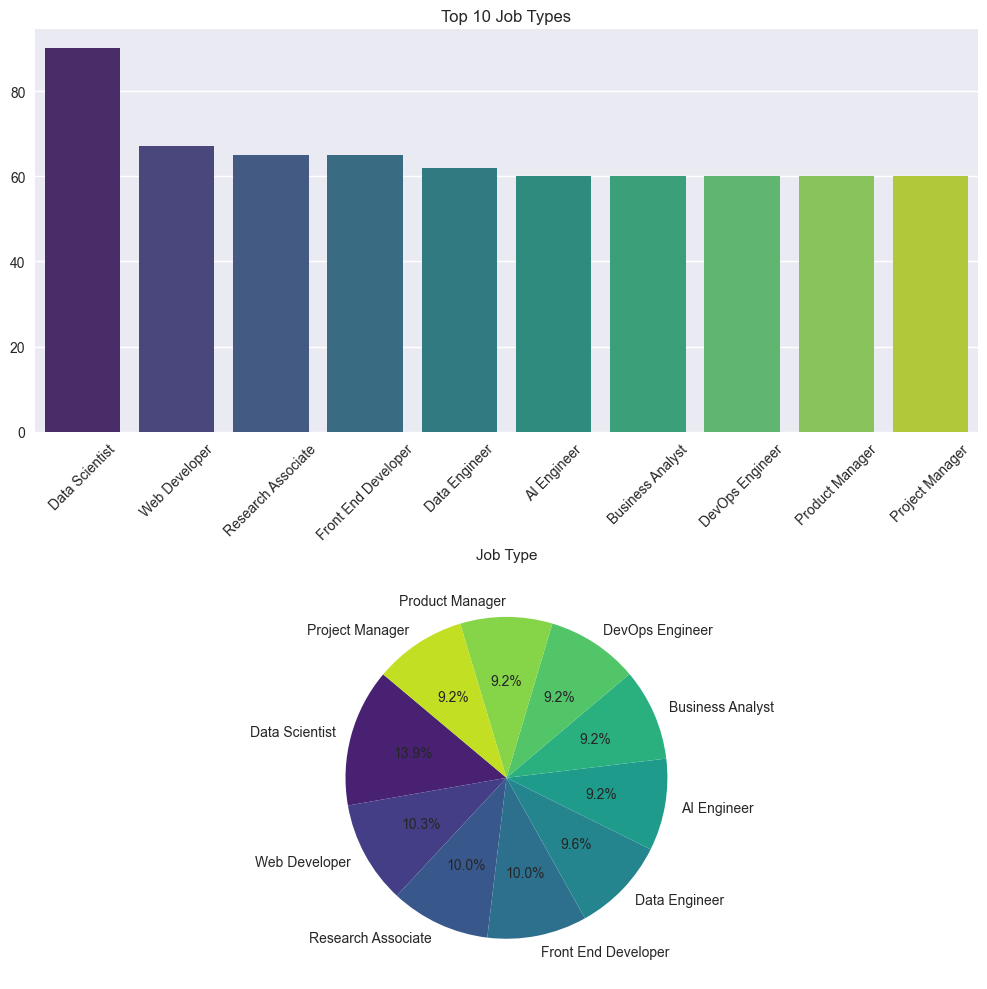

In [ ]:
plt.figure(figsize=(10,10))


plt.subplot(2,1,1)
job_type_counts = df['Job Type'].value_counts().head(10)
sns.barplot(x=job_type_counts.index, y=job_type_counts.values, palette='viridis')
plt.title('Top 10 Job Types')
plt.xticks(rotation=45)

plt.subplot(2,1,2)
plt.pie(x=job_type_counts.values, labels=job_type_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(job_type_counts)))

plt.tight_layout()

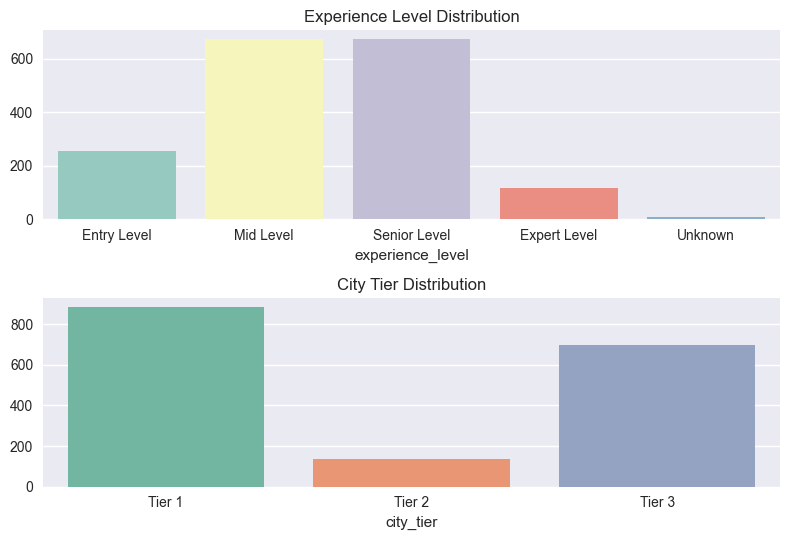

In [ ]:
plt.Figure(figsize=(5,12))

plt.subplot(2,1,1)
exp_counts = df['experience_level'].value_counts().reindex(['Entry Level', 'Mid Level', 'Senior Level', 'Expert Level', 'Unknown'])
sns.barplot(x=exp_counts.index, y=exp_counts.values, palette='Set3')
plt.title('Experience Level Distribution')

plt.subplot(2,1,2)
city_counts = df['city_tier'].value_counts().reindex(['Tier 1', 'Tier 2', 'Tier 3'])
sns.barplot(x=city_counts.index, y=city_counts.values, palette='Set2')
plt.title('City Tier Distribution')

plt.tight_layout()

Top 20 In-Demand Skills: ['python', 'sql', 'java', 'javascript', 'aws', 'machine learning', 'agile', 'html', 'project management', 'mysql', 'linux', 'devops', 'ci/cd', 'css', 'data analysis', 'git', 'react.js', 'scrum', 'docker', 'kubernetes']


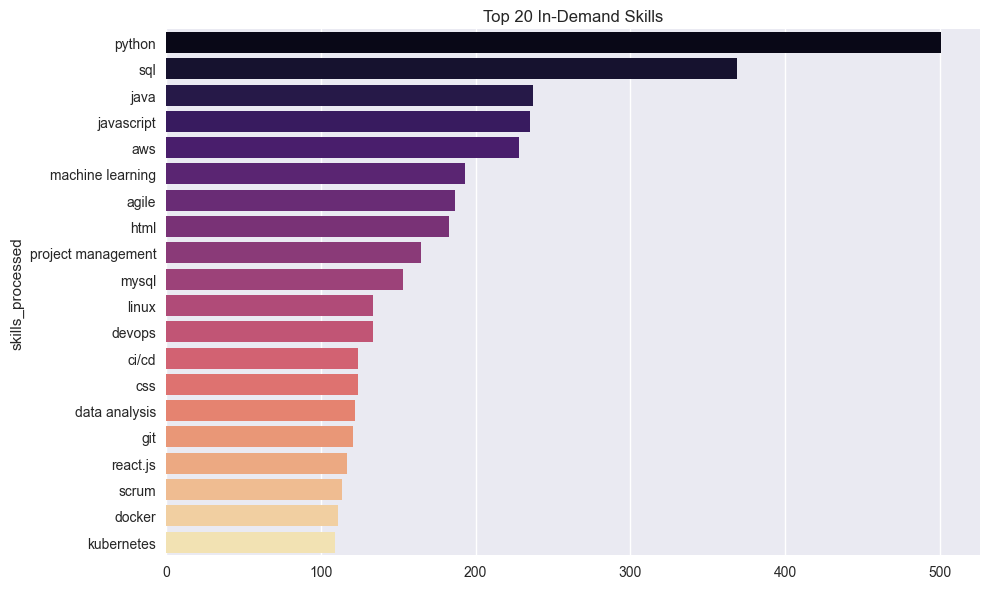

In [ ]:
skill_counts = df['skills_processed'].explode().value_counts().head(20)
print("Top 20 In-Demand Skills:", skill_counts.index.tolist())

plt.figure(figsize=(10,6))
sns.barplot(x=skill_counts.values, y=skill_counts.index, palette='magma')
plt.title('Top 20 In-Demand Skills')
plt.tight_layout()
plt.show()

In [ ]:
df['salary_numeric'].groupby(df['experience_level']).count()

experience_level
Entry Level      47
Expert Level     30
Mid Level        85
Senior Level    105
Unknown           1
Name: salary_numeric, dtype: int64

Text(0, 0.5, 'Average Salary (LPA)')

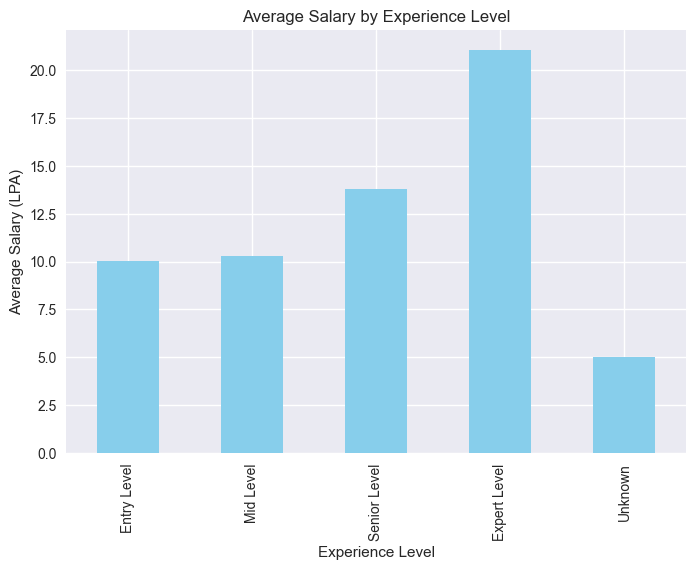

In [ ]:
df['salary_numeric'].groupby(df['experience_level']).mean().reindex(['Entry Level', 'Mid Level', 'Senior Level', 'Expert Level', 'Unknown']).plot(kind='bar', color='skyblue')
plt.title('Average Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary (LPA)')

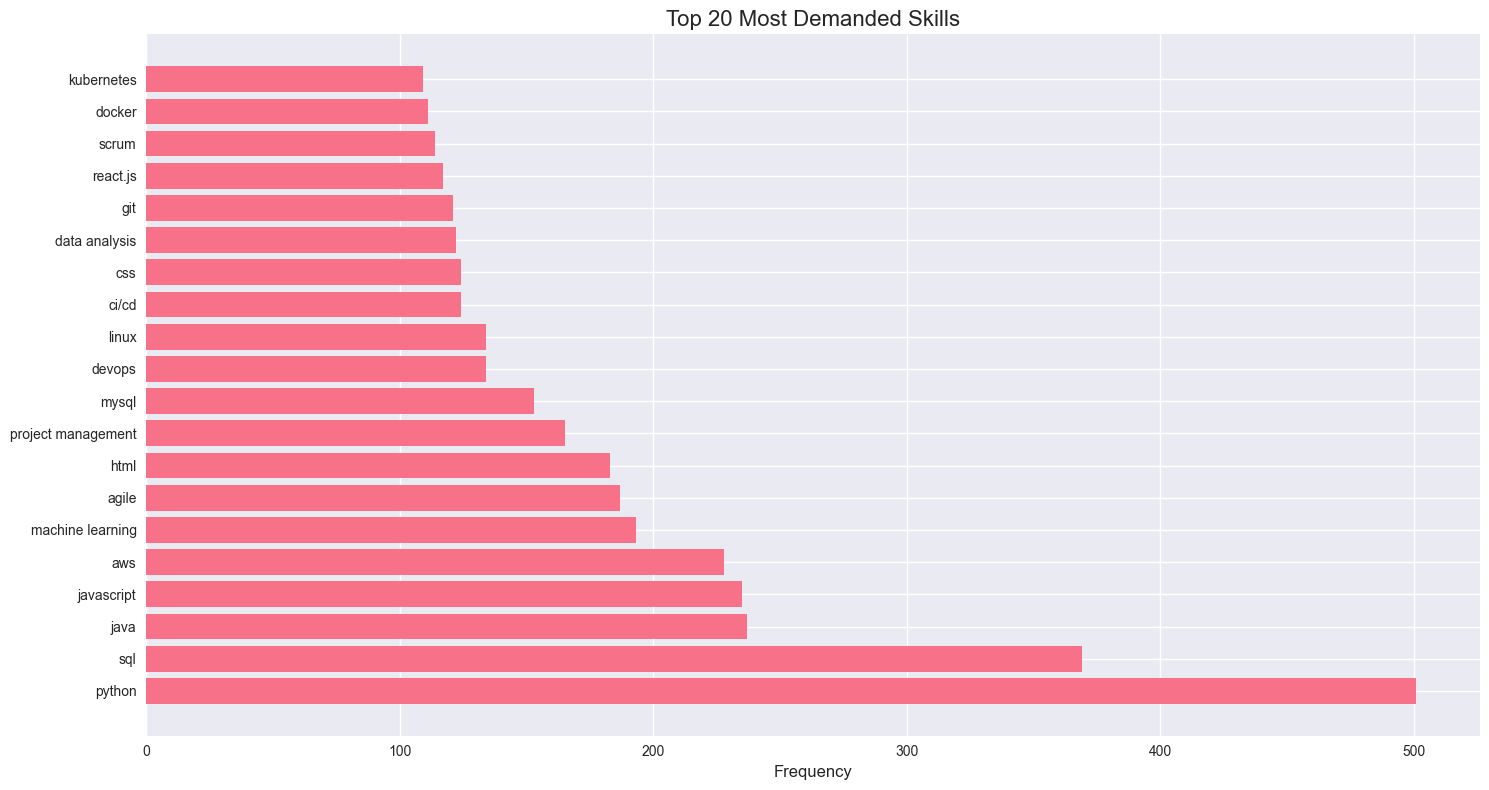

Total unique skills in dataset: 2918
Top 10 skills: ['python', 'sql', 'java', 'javascript', 'aws', 'machine learning', 'agile', 'html', 'project management', 'mysql']


In [ ]:
# Analyze top skills across all jobs
all_skills = []
for skills_list in df['skills_processed']:
    all_skills.extend(skills_list)

skill_counts = Counter(all_skills)
top_skills = dict(skill_counts.most_common(20))

plt.figure(figsize=(15, 8))
plt.barh(list(top_skills.keys()), list(top_skills.values()))
plt.title('Top 20 Most Demanded Skills', fontsize=16)
plt.xlabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

print(f"Total unique skills in dataset: {len(skill_counts)}")
print(f"Top 10 skills: {list(top_skills.keys())[:10]}")


Jobs with disclosed salary: 268 out of 1724 (15.5%)


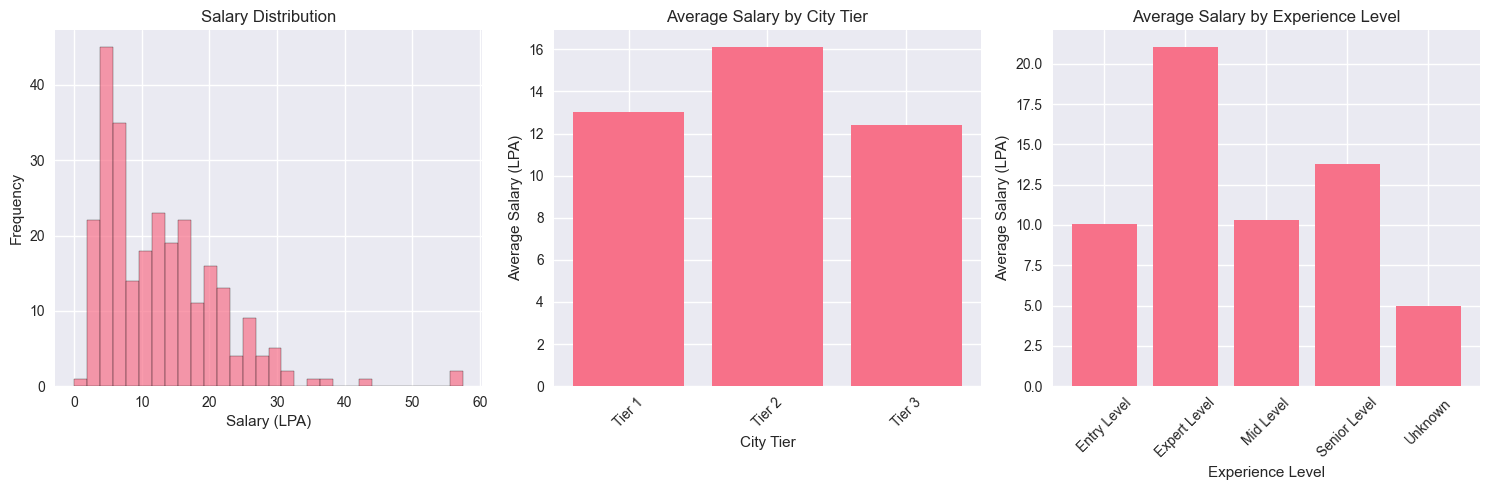


Salary Statistics:
Mean: 12.79 LPA
Median: 11.00 LPA
Std: 8.78 LPA


In [ ]:
# Salary analysis for jobs with disclosed salary
salary_disclosed = df.dropna(subset=['salary_numeric'])
print(f"Jobs with disclosed salary: {len(salary_disclosed)} out of {len(df)} ({len(salary_disclosed)/len(df)*100:.1f}%)")

if len(salary_disclosed) > 0:
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.hist(salary_disclosed['salary_numeric'], bins=30, edgecolor='black', alpha=0.7)
    plt.title('Salary Distribution')
    plt.xlabel('Salary (LPA)')
    plt.ylabel('Frequency')
    
    plt.subplot(1, 3, 2)
    salary_by_city = salary_disclosed.groupby('city_tier')['salary_numeric'].mean()
    plt.bar(salary_by_city.index, salary_by_city.values)
    plt.title('Average Salary by City Tier')
    plt.xlabel('City Tier')
    plt.ylabel('Average Salary (LPA)')
    plt.xticks(rotation=45)
    
    plt.subplot(1, 3, 3)
    salary_by_exp = salary_disclosed.groupby('experience_level')['salary_numeric'].mean()
    plt.bar(salary_by_exp.index, salary_by_exp.values)
    plt.title('Average Salary by Experience Level')
    plt.xlabel('Experience Level')
    plt.ylabel('Average Salary (LPA)')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nSalary Statistics:")
    print(f"Mean: {salary_disclosed['salary_numeric'].mean():.2f} LPA")
    print(f"Median: {salary_disclosed['salary_numeric'].median():.2f} LPA")
    print(f"Std: {salary_disclosed['salary_numeric'].std():.2f} LPA")


### Feature Engineering

In [ ]:
# Create skill-based features
def has_skill(job_skills, skill_name):
    if not job_skills:
        return 0
    return 1 if skill_name in job_skills else 0

# Create binary features for top skills
top_skill_names = list(top_skills.keys())[:15]  # Top 15 skills
for skill in top_skill_names:
    df[f'has_{skill.replace(" ", "_").replace("-", "_")}'] = df['skills_processed'].apply(
        lambda x: has_skill(x, skill)
    )

print(f"Created {len(top_skill_names)} skill-based binary features.")


Created 15 skill-based binary features.


In [ ]:
df.head()

,Job Type,Title,Company,Experience,Salary,Location,Education,Skills,Role,Industry Type,Department,Employment Type,Role Category,Description,Job URL,Timestamp,salary_numeric,experience_years,skills_processed,skills_count,experience_level,city_tier,has_python,has_sql,has_java,has_javascript,has_aws,has_machine_learning,has_agile,has_html,has_project_management,has_mysql,has_devops,has_linux,has_ci/cd,has_css,has_data_analysis
0,Data Scientist,Data Scientist,Blue Star,0 - 2 years,Not Disclosed,Thane,EducationUG:Any GraduatePG:Any Postgraduate,"[[], ['algorithms', 'python', 'modeling', 'dat...","Data Scientist ,","Industrial Equipment / Machinery ,","Data Science & Analytics ,","Full Time, Permanent",Data Science & Machine Learning,Blue Star Ltd is looking for Data Scientist to...,https://www.naukri.com/job-listings-data-scien...,2025-09-17 05:44:17,NaN,1.0,"[algorithms, python, modeling, data analysis, ...",17,Entry Level,Tier 2,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1
1,Data Scientist,Data Scientist,Capgemini,4 - 7 years,Not Disclosed,Bengaluru,EducationUG:Any GraduatePG:Any Postgraduate,"[['python', 'machine learning', 'tensorflow', ...","Data Scientist ,","IT Services & Consulting ,","Data Science & Analytics ,","Full Time, Permanent",Data Science & Machine Learning,"Your Role Gen AI ,Computer vision, Cloud exp ,...",https://www.naukri.com/job-listings-data-scien...,2025-09-17 05:44:22,NaN,5.5,"[python, machine learning, tensorflow, pytorch...",21,Senior Level,Tier 1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0
2,Data Scientist,Data Scientist,Cognizant,8 - 10 years,Not Disclosed,Chennai,EducationPG:LLM in Any Specialization,"[[], ['kubernetes', 'algorithms', 'python', 'd...","Full Stack Data Scientist ,","IT Services & Consulting ,","Data Science & Analytics ,","Full Time, Permanent",Data Science & Machine Learning,Role –Gen AI Engineer (Senior / Manager) Job L...,https://www.naukri.com/job-listings-data-scien...,2025-09-17 05:44:28,NaN,9.0,"[kubernetes, algorithms, python, data manageme...",21,Senior Level,Tier 1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0
3,Data Scientist,Data Scientist,Kotak Life Insurance,5 - 10 years,Not Disclosed,Bengaluru,EducationUG:Any GraduatePG:Any Postgraduate,"[['software development', 'presentation skills...","Full Stack Data Scientist ,","IT Services & Consulting ,","Data Science & Analytics ,","Full Time, Permanent",Data Science & Machine Learning,About The Role What we offer Our mission is si...,https://www.naukri.com/job-listings-data-scien...,2025-09-17 05:44:35,NaN,7.5,"[software development, presentation skills, da...",23,Senior Level,Tier 1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0
4,Data Scientist,Data Scientist - Artificial Intelligence,IBM,3 - 6 years,Not Disclosed,Bengaluru,EducationUG:B.Tech/B.E. in Any SpecializationP...,"[['Artificial Intelligence'], ['Data Science',...","Data Scientist ,","IT Services & Consulting ,","Data Science & Analytics ,","Full Time, Permanent",Data Science & Machine Learning,"As an Associate Data Scientist at IBM, you wil...",https://www.naukri.com/job-listings-data-scien...,2025-09-17 05:44:41,NaN,4.5,"[artificial intelligence, data science, matplo...",9,Mid Level,Tier 1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Create skill category features
programming_skills = ['python', 'java', 'r', 'sql', 'javascript', 'c++', 'scala']
ml_skills = ['machine learning', 'deep learning', 'tensorflow', 'pytorch', 'keras', 'scikit-learn', 'xgboost']
data_skills = ['data analysis', 'data science', 'statistics', 'data visualization', 'tableau', 'power bi']
cloud_skills = ['aws', 'azure', 'gcp', 'google cloud', 'microsoft azure']

def count_skill_category(job_skills, category_skills):
    if not job_skills:
        return 0
    return sum(1 for skill in job_skills if skill in category_skills)

df['programming_skills_count'] = df['skills_processed'].apply(
    lambda x: count_skill_category(x, programming_skills)
)
df['ml_skills_count'] = df['skills_processed'].apply(
    lambda x: count_skill_category(x, ml_skills)
)
df['data_skills_count'] = df['skills_processed'].apply(
    lambda x: count_skill_category(x, data_skills)
)
df['cloud_skills_count'] = df['skills_processed'].apply(
    lambda x: count_skill_category(x, cloud_skills)
)

print("Created skill category count features:")
print(f"Programming skills: {df['programming_skills_count'].mean():.2f} average per job")
print(f"ML skills: {df['ml_skills_count'].mean():.2f} average per job")
print(f"Data skills: {df['data_skills_count'].mean():.2f} average per job")
print(f"Cloud skills: {df['cloud_skills_count'].mean():.2f} average per job")


Created skill category count features:
Programming skills: 0.82 average per job
ML skills: 0.23 average per job
Data skills: 0.25 average per job
Cloud skills: 0.26 average per job


In [ ]:
df.head()

,Job Type,Title,Company,Experience,Salary,Location,Education,Skills,Role,Industry Type,Department,Employment Type,Role Category,Description,Job URL,Timestamp,salary_numeric,experience_years,skills_processed,skills_count,experience_level,city_tier,has_python,has_sql,has_java,has_javascript,has_aws,has_machine_learning,has_agile,has_html,has_project_management,has_mysql,has_devops,has_linux,has_ci/cd,has_css,has_data_analysis,programming_skills_count,ml_skills_count,data_skills_count,cloud_skills_count
0,Data Scientist,Data Scientist,Blue Star,0 - 2 years,Not Disclosed,Thane,EducationUG:Any GraduatePG:Any Postgraduate,"[[], ['algorithms', 'python', 'modeling', 'dat...","Data Scientist ,","Industrial Equipment / Machinery ,","Data Science & Analytics ,","Full Time, Permanent",Data Science & Machine Learning,Blue Star Ltd is looking for Data Scientist to...,https://www.naukri.com/job-listings-data-scien...,2025-09-17 05:44:17,NaN,1.0,"[algorithms, python, modeling, data analysis, ...",17,Entry Level,Tier 2,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,2,1,5,0
1,Data Scientist,Data Scientist,Capgemini,4 - 7 years,Not Disclosed,Bengaluru,EducationUG:Any GraduatePG:Any Postgraduate,"[['python', 'machine learning', 'tensorflow', ...","Data Scientist ,","IT Services & Consulting ,","Data Science & Analytics ,","Full Time, Permanent",Data Science & Machine Learning,"Your Role Gen AI ,Computer vision, Cloud exp ,...",https://www.naukri.com/job-listings-data-scien...,2025-09-17 05:44:22,NaN,5.5,"[python, machine learning, tensorflow, pytorch...",21,Senior Level,Tier 1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,4,1,1
2,Data Scientist,Data Scientist,Cognizant,8 - 10 years,Not Disclosed,Chennai,EducationPG:LLM in Any Specialization,"[[], ['kubernetes', 'algorithms', 'python', 'd...","Full Stack Data Scientist ,","IT Services & Consulting ,","Data Science & Analytics ,","Full Time, Permanent",Data Science & Machine Learning,Role –Gen AI Engineer (Senior / Manager) Job L...,https://www.naukri.com/job-listings-data-scien...,2025-09-17 05:44:28,NaN,9.0,"[kubernetes, algorithms, python, data manageme...",21,Senior Level,Tier 1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,5,0,3
3,Data Scientist,Data Scientist,Kotak Life Insurance,5 - 10 years,Not Disclosed,Bengaluru,EducationUG:Any GraduatePG:Any Postgraduate,"[['software development', 'presentation skills...","Full Stack Data Scientist ,","IT Services & Consulting ,","Data Science & Analytics ,","Full Time, Permanent",Data Science & Machine Learning,About The Role What we offer Our mission is si...,https://www.naukri.com/job-listings-data-scien...,2025-09-17 05:44:35,NaN,7.5,"[software development, presentation skills, da...",23,Senior Level,Tier 1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,4,0,0,1
4,Data Scientist,Data Scientist - Artificial Intelligence,IBM,3 - 6 years,Not Disclosed,Bengaluru,EducationUG:B.Tech/B.E. in Any SpecializationP...,"[['Artificial Intelligence'], ['Data Science',...","Data Scientist ,","IT Services & Consulting ,","Data Science & Analytics ,","Full Time, Permanent",Data Science & Machine Learning,"As an Associate Data Scientist at IBM, you wil...",https://www.naukri.com/job-listings-data-scien...,2025-09-17 05:44:41,NaN,4.5,"[artificial intelligence, data science, matplo...",9,Mid Level,Tier 1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,0


In [ ]:
# Create company size and industry features
# Group companies by frequency (proxy for company size)
company_counts = df['Company'].value_counts()
df['company_size'] = df['Company'].map(company_counts).fillna(1)

# Categorize company size
def categorize_company_size(size):
    if size == 1:
        return 'Small'
    elif size <= 5:
        return 'Medium'
    else:
        return 'Large'

df['company_size_category'] = df['company_size'].apply(categorize_company_size)

# Create education level encoding
def encode_education(edu):
    edu_lower = str(edu).lower()
    if 'pg:' in edu_lower or 'postgraduate' in edu_lower:
        return 'Postgraduate'
    elif 'ug:' in edu_lower or 'graduate' in edu_lower:
        return 'Graduate'
    else:
        return 'Other'

df['education_level'] = df['Education'].apply(encode_education)

print("Created company and education features:")
print(f"Company size categories: {df['company_size_category'].value_counts().to_dict()}")
print(f"Education levels: {df['education_level'].value_counts().to_dict()}")


Created company and education features:
Company size categories: {'Large': 615, 'Medium': 607, 'Small': 502}
Education levels: {'Postgraduate': 1240, 'Graduate': 482, 'Other': 2}


In [ ]:
df.head()

,Job Type,Title,Company,Experience,Salary,Location,Education,Skills,Role,Industry Type,Department,Employment Type,Role Category,Description,Job URL,Timestamp,salary_numeric,experience_years,skills_processed,skills_count,experience_level,city_tier,has_python,has_sql,has_java,has_javascript,has_aws,has_machine_learning,has_agile,has_html,has_project_management,has_mysql,has_devops,has_linux,has_ci/cd,has_css,has_data_analysis,programming_skills_count,ml_skills_count,data_skills_count,cloud_skills_count,company_size,company_size_category,education_level
0,Data Scientist,Data Scientist,Blue Star,0 - 2 years,Not Disclosed,Thane,EducationUG:Any GraduatePG:Any Postgraduate,"[[], ['algorithms', 'python', 'modeling', 'dat...","Data Scientist ,","Industrial Equipment / Machinery ,","Data Science & Analytics ,","Full Time, Permanent",Data Science & Machine Learning,Blue Star Ltd is looking for Data Scientist to...,https://www.naukri.com/job-listings-data-scien...,2025-09-17 05:44:17,NaN,1.0,"[algorithms, python, modeling, data analysis, ...",17,Entry Level,Tier 2,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,2,1,5,0,4,Medium,Postgraduate
1,Data Scientist,Data Scientist,Capgemini,4 - 7 years,Not Disclosed,Bengaluru,EducationUG:Any GraduatePG:Any Postgraduate,"[['python', 'machine learning', 'tensorflow', ...","Data Scientist ,","IT Services & Consulting ,","Data Science & Analytics ,","Full Time, Permanent",Data Science & Machine Learning,"Your Role Gen AI ,Computer vision, Cloud exp ,...",https://www.naukri.com/job-listings-data-scien...,2025-09-17 05:44:22,NaN,5.5,"[python, machine learning, tensorflow, pytorch...",21,Senior Level,Tier 1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,4,1,1,45,Large,Postgraduate
2,Data Scientist,Data Scientist,Cognizant,8 - 10 years,Not Disclosed,Chennai,EducationPG:LLM in Any Specialization,"[[], ['kubernetes', 'algorithms', 'python', 'd...","Full Stack Data Scientist ,","IT Services & Consulting ,","Data Science & Analytics ,","Full Time, Permanent",Data Science & Machine Learning,Role –Gen AI Engineer (Senior / Manager) Job L...,https://www.naukri.com/job-listings-data-scien...,2025-09-17 05:44:28,NaN,9.0,"[kubernetes, algorithms, python, data manageme...",21,Senior Level,Tier 1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,5,0,3,13,Large,Postgraduate
3,Data Scientist,Data Scientist,Kotak Life Insurance,5 - 10 years,Not Disclosed,Bengaluru,EducationUG:Any GraduatePG:Any Postgraduate,"[['software development', 'presentation skills...","Full Stack Data Scientist ,","IT Services & Consulting ,","Data Science & Analytics ,","Full Time, Permanent",Data Science & Machine Learning,About The Role What we offer Our mission is si...,https://www.naukri.com/job-listings-data-scien...,2025-09-17 05:44:35,NaN,7.5,"[software development, presentation skills, da...",23,Senior Level,Tier 1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,4,0,0,1,3,Medium,Postgraduate
4,Data Scientist,Data Scientist - Artificial Intelligence,IBM,3 - 6 years,Not Disclosed,Bengaluru,EducationUG:B.Tech/B.E. in Any SpecializationP...,"[['Artificial Intelligence'], ['Data Science',...","Data Scientist ,","IT Services & Consulting ,","Data Science & Analytics ,","Full Time, Permanent",Data Science & Machine Learning,"As an Associate Data Scientist at IBM, you wil...",https://www.naukri.com/job-listings-data-scien...,2025-09-17 05:44:41,NaN,4.5,"[artificial intelligence, data science, matplo...",9,Mid Level,Tier 1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,0,43,Large,Postgraduate


## 5. Salary Prediction Model (Regression)


In [ ]:
# Prepare data for salary prediction
salary_data = df.dropna(subset=['salary_numeric']).copy()
print(f"Jobs with salary data: {len(salary_data)}")

# Define features for salary prediction
salary_features = [
    'experience_years', 'skills_count', 'programming_skills_count', 
    'ml_skills_count', 'data_skills_count', 'cloud_skills_count',
    'company_size'
]

# Add skill binary features
skill_features = [col for col in df.columns if col.startswith('has_')]
salary_features.extend(skill_features)

# Add categorical features (will be encoded)
categorical_features = ['city_tier', 'experience_level', 'education_level', 'company_size_category']

# Prepare feature matrix
X_salary = salary_data[salary_features + categorical_features].copy()
y_salary = salary_data['salary_numeric']

# Handle missing values
X_salary = X_salary.fillna(0)

print(f"Features for salary prediction: {len(salary_features + categorical_features)}")
print(f"Shape: {X_salary.shape}")


Jobs with salary data: 268
Features for salary prediction: 26
Shape: (268, 26)


In [ ]:
# Create preprocessing pipeline for salary prediction
# Encode categorical variables
X_salary_encoded = X_salary.copy()

# Encode categorical columns
for col in categorical_features:
    le = LabelEncoder()
    X_salary_encoded[f'{col}_encoded'] = le.fit_transform(X_salary_encoded[col].astype(str))

# Drop original categorical columns
X_salary_final = X_salary_encoded.drop(columns=categorical_features)

# Split the data
X_train_sal, X_test_sal, y_train_sal, y_test_sal = train_test_split(
    X_salary_final, y_salary, test_size=0.2, random_state=42
)

# Scale the features
scaler = StandardScaler()
X_train_sal_scaled = scaler.fit_transform(X_train_sal)
X_test_sal_scaled = scaler.transform(X_test_sal)

print(f"Training set size: {X_train_sal_scaled.shape}")
print(f"Test set size: {X_test_sal_scaled.shape}")


Training set size: (214, 26)
Test set size: (54, 26)


In [ ]:
# Train multiple regression models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

salary_results = {}

for name, model in models.items():
    # Train model
    model.fit(X_train_sal_scaled, y_train_sal)
    
    # Make predictions
    y_pred_train = model.predict(X_train_sal_scaled)
    y_pred_test = model.predict(X_test_sal_scaled)
    
    # Calculate metrics
    train_r2 = r2_score(y_train_sal, y_pred_train)
    test_r2 = r2_score(y_test_sal, y_pred_test)
    train_rmse = np.sqrt(mean_squared_error(y_train_sal, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test_sal, y_pred_test))
    
    salary_results[name] = {
        'train_r2': train_r2,
        'test_r2': test_r2,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'model': model
    }
    
    print(f"\n{name} Results:")
    print(f"Train R²: {train_r2:.4f}")
    print(f"Test R²: {test_r2:.4f}")
    print(f"Train RMSE: {train_rmse:.4f} LPA")
    print(f"Test RMSE: {test_rmse:.4f} LPA")



Linear Regression Results:
Train R²: 0.3333
Test R²: -0.0687
Train RMSE: 7.4321 LPA
Test RMSE: 7.3766 LPA

Random Forest Results:
Train R²: 0.9122
Test R²: 0.0187
Train RMSE: 2.6970 LPA
Test RMSE: 7.0685 LPA


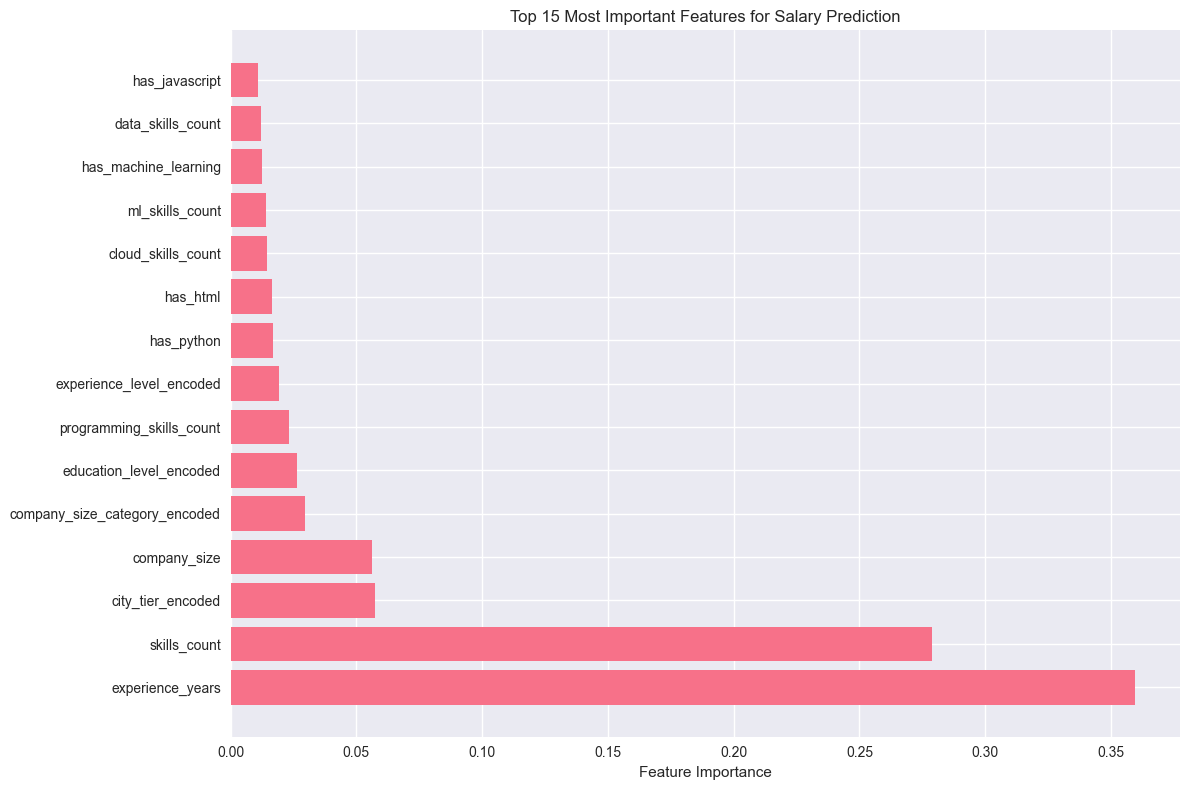

Top 10 most important features:
                          feature  importance
0                experience_years    0.359452
1                    skills_count    0.278640
22              city_tier_encoded    0.057405
6                    company_size    0.056079
25  company_size_category_encoded    0.029389
24        education_level_encoded    0.026261
2        programming_skills_count    0.023386
23       experience_level_encoded    0.019355
7                      has_python    0.016973
14                       has_html    0.016572


In [ ]:
# Feature importance for Random Forest
rf_model = salary_results['Random Forest']['model']
feature_names = X_salary_final.columns
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
top_features = importance_df.head(15)
plt.barh(top_features['feature'], top_features['importance'])
plt.title('Top 15 Most Important Features for Salary Prediction')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()

print("Top 10 most important features:")
print(importance_df.head(10)[['feature', 'importance']])


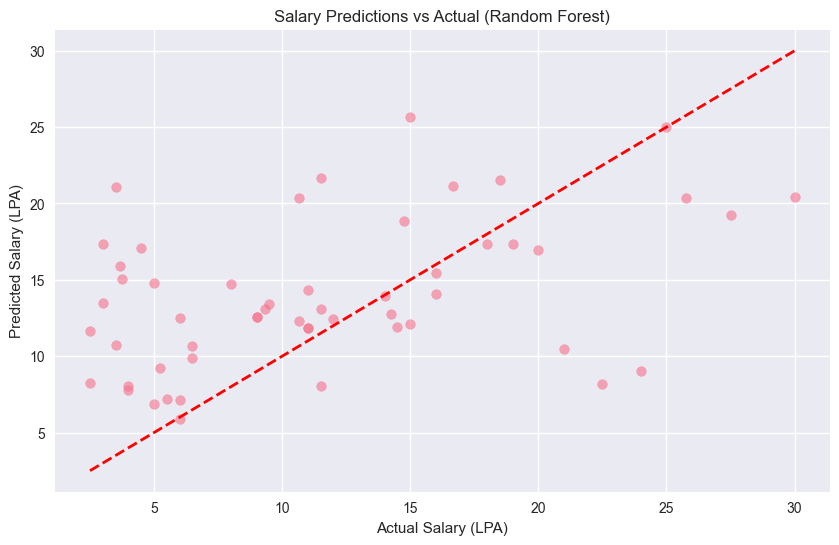

Best model: Random Forest
R² Score: 0.0187
RMSE: 7.0685 LPA


In [ ]:
# Visualize predictions vs actual values
best_model_name = max(salary_results.keys(), key=lambda x: salary_results[x]['test_r2'])
best_model = salary_results[best_model_name]['model']

y_pred_best = best_model.predict(X_test_sal_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(y_test_sal, y_pred_best, alpha=0.6)
plt.plot([y_test_sal.min(), y_test_sal.max()], [y_test_sal.min(), y_test_sal.max()], 'r--', lw=2)
plt.xlabel('Actual Salary (LPA)')
plt.ylabel('Predicted Salary (LPA)')
plt.title(f'Salary Predictions vs Actual ({best_model_name})')
plt.show()

print(f"Best model: {best_model_name}")
print(f"R² Score: {salary_results[best_model_name]['test_r2']:.4f}")
print(f"RMSE: {salary_results[best_model_name]['test_rmse']:.4f} LPA")


## 6. Job Title Prediction Model (Classification)


In [ ]:
# Prepare data for job title classification
# Focus on the most common job titles
title_counts = df['Job Type'].value_counts()
top_titles = title_counts.head(10).index.tolist()

print(f"Top 10 job titles:")
for i, title in enumerate(top_titles, 1):
    print(f"{i}. {title}: {title_counts[title]} jobs")

# Filter data for top job titles
classification_data = df[df['Job Type'].isin(top_titles)].copy()
print(f"\nJobs for classification: {len(classification_data)}")
print(f"Unique job titles: {classification_data['Job Type'].nunique()}")


Top 10 job titles:
1. Data Scientist: 90 jobs
2. Web Developer: 67 jobs
3. Research Associate: 65 jobs
4. Front End Developer: 65 jobs
5. Data Engineer: 62 jobs
6. AI Engineer: 60 jobs
7. Business Analyst: 60 jobs
8. DevOps Engineer: 60 jobs
9. Product Manager: 60 jobs
10. Project Manager: 60 jobs

Jobs for classification: 649
Unique job titles: 10


In [ ]:
# Define features for job title classification
classification_features = [
    'experience_years', 'skills_count', 'programming_skills_count', 
    'ml_skills_count', 'data_skills_count', 'cloud_skills_count',
    'company_size'
]

# Add skill binary features
classification_features.extend(skill_features)

# Prepare feature matrix
X_class = classification_data[classification_features + categorical_features].copy()
y_class = classification_data['Job Type']

# Handle missing values
X_class = X_class.fillna(0)

print(f"Features for classification: {len(classification_features + categorical_features)}")
print(f"Shape: {X_class.shape}")
print(f"Target classes: {y_class.nunique()}")


Features for classification: 26
Shape: (649, 26)
Target classes: 10


In [ ]:
# Encode categorical variables for classification
X_class_encoded = X_class.copy()

# Encode categorical columns
for col in categorical_features:
    le = LabelEncoder()
    X_class_encoded[f'{col}_encoded'] = le.fit_transform(X_class_encoded[col].astype(str))

# Drop original categorical columns
X_class_final = X_class_encoded.drop(columns=categorical_features)

# Split the data
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class_final, y_class, test_size=0.2, random_state=42, stratify=y_class
)

# Scale the features
scaler_class = StandardScaler()
X_train_class_scaled = scaler_class.fit_transform(X_train_class)
X_test_class_scaled = scaler_class.transform(X_test_class)

print(f"Training set size: {X_train_class_scaled.shape}")
print(f"Test set size: {X_test_class_scaled.shape}")
print(f"Class distribution in training set:")
print(y_train_class.value_counts())


Training set size: (519, 26)
Test set size: (130, 26)
Class distribution in training set:
Job Type
Data Scientist         72
Web Developer          53
Research Associate     52
Front End Developer    52
Data Engineer          50
Product Manager        48
Business Analyst       48
DevOps Engineer        48
AI Engineer            48
Project Manager        48
Name: count, dtype: int64


In [ ]:
# Train multiple classification models
class_models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

classification_results = {}

for name, model in class_models.items():
    # Train model
    model.fit(X_train_class_scaled, y_train_class)
    
    # Make predictions
    y_pred_train = model.predict(X_train_class_scaled)
    y_pred_test = model.predict(X_test_class_scaled)
    
    # Calculate accuracy
    train_acc = (y_pred_train == y_train_class).mean()
    test_acc = (y_pred_test == y_test_class).mean()
    
    classification_results[name] = {
        'train_accuracy': train_acc,
        'test_accuracy': test_acc,
        'model': model,
        'predictions': y_pred_test
    }
    
    print(f"\n{name} Results:")
    print(f"Train Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy: {test_acc:.4f}")



Logistic Regression Results:
Train Accuracy: 0.7765
Test Accuracy: 0.6692

Random Forest Results:
Train Accuracy: 0.9961
Test Accuracy: 0.6538



Detailed Classification Report for Logistic Regression:
                     precision    recall  f1-score   support

        AI Engineer       0.62      0.42      0.50        12
   Business Analyst       0.75      0.50      0.60        12
      Data Engineer       0.71      0.42      0.53        12
     Data Scientist       0.64      0.89      0.74        18
    DevOps Engineer       1.00      1.00      1.00        12
Front End Developer       0.54      0.54      0.54        13
    Product Manager       0.50      0.58      0.54        12
    Project Manager       0.79      0.92      0.85        12
 Research Associate       0.60      0.92      0.73        13
      Web Developer       0.67      0.43      0.52        14

           accuracy                           0.67       130
          macro avg       0.68      0.66      0.65       130
       weighted avg       0.68      0.67      0.66       130



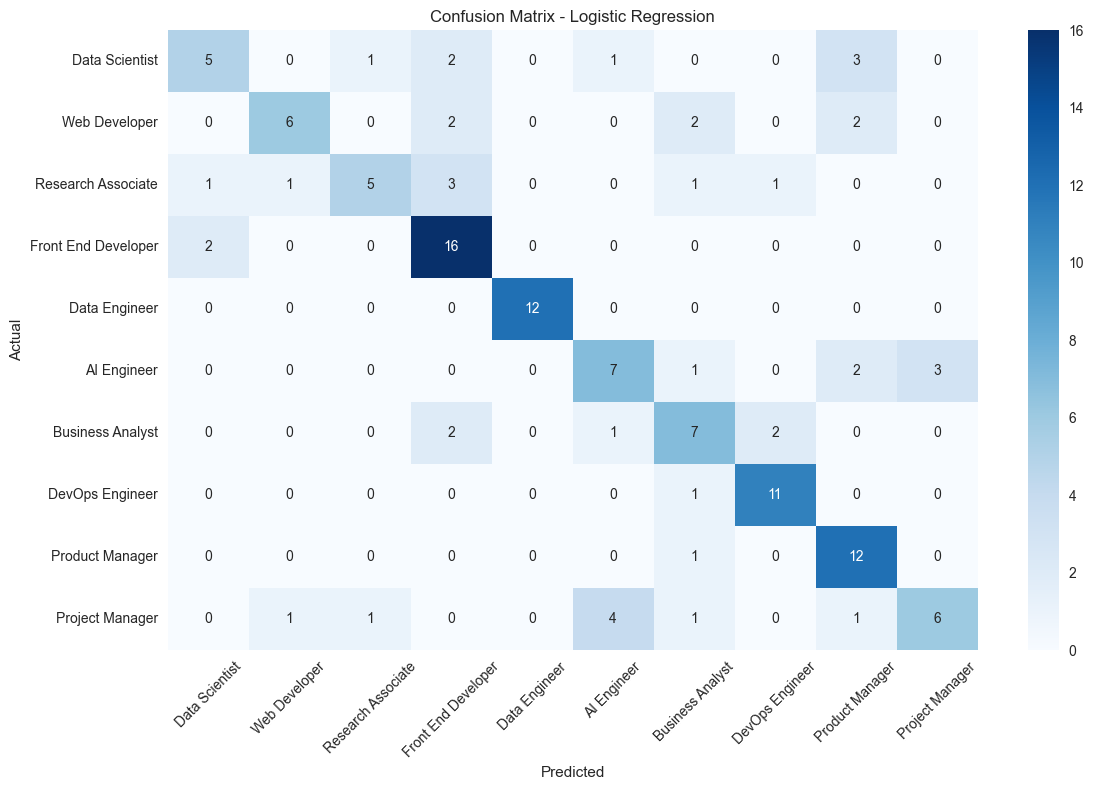

In [ ]:
# Detailed classification report for the best model
best_class_model_name = max(classification_results.keys(), key=lambda x: classification_results[x]['test_accuracy'])
best_class_model = classification_results[best_class_model_name]['model']
best_predictions = classification_results[best_class_model_name]['predictions']

print(f"\nDetailed Classification Report for {best_class_model_name}:")
print("=" * 50)
print(classification_report(y_test_class, best_predictions))

# Confusion Matrix
cm = confusion_matrix(y_test_class, best_predictions)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=top_titles, yticklabels=top_titles)
plt.title(f'Confusion Matrix - {best_class_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


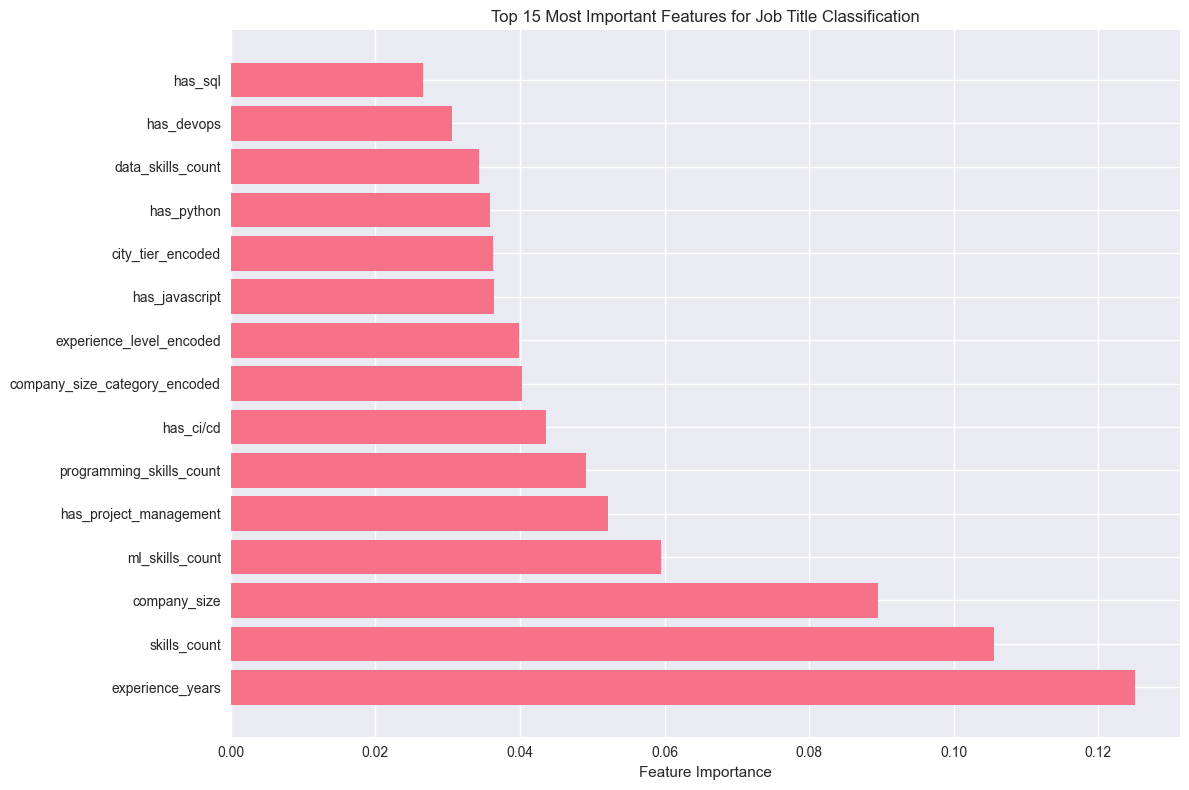

Top 10 most important features for classification:
                          feature  importance
0                experience_years    0.125031
1                    skills_count    0.105626
6                    company_size    0.089541
3                 ml_skills_count    0.059574
15         has_project_management    0.052246
2        programming_skills_count    0.049079
19                      has_ci/cd    0.043559
25  company_size_category_encoded    0.040314
23       experience_level_encoded    0.039889
10                 has_javascript    0.036374


In [ ]:
# Feature importance for Random Forest Classifier
if 'Random Forest' in classification_results:
    rf_class_model = classification_results['Random Forest']['model']
    feature_names_class = X_class_final.columns
    
    importance_df_class = pd.DataFrame({
        'feature': feature_names_class,
        'importance': rf_class_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(12, 8))
    top_features_class = importance_df_class.head(15)
    plt.barh(top_features_class['feature'], top_features_class['importance'])
    plt.title('Top 15 Most Important Features for Job Title Classification')
    plt.xlabel('Feature Importance')
    plt.tight_layout()
    plt.show()
    
    print("Top 10 most important features for classification:")
    print(importance_df_class.head(10)[['feature', 'importance']])


## 7. Model Evaluation and Insights


In [ ]:
# Create a comprehensive results summary
print("=" * 60)
print("COMPREHENSIVE MODEL EVALUATION RESULTS")
print("=" * 60)

print("\n1. SALARY PREDICTION MODELS:")
print("-" * 30)
for model_name, results in salary_results.items():
    print(f"{model_name}:")
    print(f"  - Test R² Score: {results['test_r2']:.4f}")
    print(f"  - Test RMSE: {results['test_rmse']:.4f} LPA")
    print(f"  - Train R² Score: {results['train_r2']:.4f}")
    print()

print("\n2. JOB TITLE CLASSIFICATION MODELS:")
print("-" * 35)
for model_name, results in classification_results.items():
    print(f"{model_name}:")
    print(f"  - Test Accuracy: {results['test_accuracy']:.4f} ({results['test_accuracy']*100:.2f}%)")
    print(f"  - Train Accuracy: {results['train_accuracy']:.4f} ({results['train_accuracy']*100:.2f}%)")
    print()

print("\n3. DATASET SUMMARY:")
print("-" * 20)
print(f"Total jobs analyzed: {len(df)}")
print(f"Jobs with salary data: {len(salary_data)} ({len(salary_data)/len(df)*100:.1f}%)")
print(f"Jobs for classification: {len(classification_data)}")
print(f"Unique job titles: {df['Job Type'].nunique()}")
print(f"Unique companies: {df['Company'].nunique()}")
print(f"Unique locations: {df['Location'].nunique()}")
print(f"Total unique skills: {len(skill_counts)}")


COMPREHENSIVE MODEL EVALUATION RESULTS

1. SALARY PREDICTION MODELS:
------------------------------
Linear Regression:
  - Test R² Score: -0.0687
  - Test RMSE: 7.3766 LPA
  - Train R² Score: 0.3333

Random Forest:
  - Test R² Score: 0.0187
  - Test RMSE: 7.0685 LPA
  - Train R² Score: 0.9122


2. JOB TITLE CLASSIFICATION MODELS:
-----------------------------------
Logistic Regression:
  - Test Accuracy: 0.6692 (66.92%)
  - Train Accuracy: 0.7765 (77.65%)

Random Forest:
  - Test Accuracy: 0.6538 (65.38%)
  - Train Accuracy: 0.9961 (99.61%)


3. DATASET SUMMARY:
--------------------
Total jobs analyzed: 1724
Jobs with salary data: 268 (15.5%)
Jobs for classification: 649
Unique job titles: 30
Unique companies: 792
Unique locations: 233
Total unique skills: 2918
